# Sistem Rekomendasi: [Rekomendasi Buku]
- **Nama:** [Amanda Riyas Utami]
- **Email:** [amandariyas12@gmail.com]
- **ID Dicoding:** [MC223D5X0901]
- **Link Dataset:** https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

## Project Overview
Dalam era digital saat ini, jumlah buku yang tersedia di pasaran sangat besar dan terus bertambah. Baik toko buku online maupun platform digital memerlukan sistem yang mampu membantu pembaca menemukan buku yang relevan dengan minat dan preferensi mereka. Tanpa bantuan sistem rekomendasi yang cerdas, pembaca akan kesulitan menemukan buku yang sesuai, dan perusahaan berpotensi kehilangan peluang penjualan. Permasalahan ini menjadi penting untuk dipecahkan karena sistem rekomendasi yang baik tidak hanya meningkatkan pengalaman pengguna tetapi juga berdampak langsung terhadap performa bisnis. Dengan merekomendasikan buku-buku yang relevan berdasarkan kesamaan konten, perusahaan penerbitan atau penjualan buku dapat meningkatkan kepuasan pelanggan sekaligus mendorong penjualan secara lebih efisien. Proyek ini bertujuan untuk membangun sistem rekomendasi buku berbasis content-based filtering dengan memanfaatkan data deskriptif buku seperti nama buku, genre, author, penerbit, dan bahasa buku. Sistem ini akan mengidentifikasi buku-buku yang mirip satu sama lain menggunakan teknik pemrosesan bahasa alami (TF-IDF) dan pengukuran kesamaan (cosine similarity). Dari penelitian terdahulu yang berjudul "Sistem Rekomendasi Buku Menggunakan Metode Content Best Filtering mendapatkan hasil bahwa Sistem rekomendasi buku dengan menggunakan teknik pembobotan TF-IDF dan algoritma cosine similarity dapat memberikan rekomendasi kepada pengguna sesuai dengan kemiripan data buku yang tersedia pada database, pada penelitiannya akurasi sistem rekomendasi buku menggunakan content best filtering memiliki tingkat akurasi precision sebesar 85% (Zayyad, 2021). Sehingga pada penelitian ini akan mencoba membuktikan apakah metode content best filtering bisa atau tidak memberikan akurasi yang akurat mengenai sistem rekomendasi buku.

## Business Understanding
Suatu perusahaan yang bergerak di bidang penerbitan atau penjualan buku tentunya perlu memahami minat dan preferensi pembaca. Memahami tren minat baca sangat penting agar perusahaan dapat memasarkan dan menerbitkan buku yang relevan, sehingga dapat meningkatkan penjualan dan kepuasan pelanggan. Oleh karena itu, diperlukan sistem rekomendasi yang mampu menyarankan buku sesuai dengan minat pembaca berdasarkan konten atau informasi terkait buku-buku yang telah tersedia.

### Problem Statements
- Diperlukan metode untuk mengidentifikasi buku-buku yang memiliki kemiripan topik atau konten dengan buku yang sedang dibaca atau disukai oleh pembaca
- Perusahaan membutuhkan model yang dapat digunakan untuk membangun sistem rekomendasi buku berbasis konten guna meningkatkan relevansi dan kepuasan pelanggan

### Goals
- Mengembangkan metode berbasis pemrosesan teks dan pembelajaran mesin untuk mengidentifikasi buku-buku dengan kemiripan konten atau topik secara otomatis
- Membangun sistem rekomendasi buku berbasis content-based filtering yang mampu memberikan saran buku yang relevan dengan preferensi pembaca, sehingga dapat mendukung strategi bisnis perusahaan dalam meningkatkan penjualan dan kepuasan pelanggan

## Solution statements
- Membuat sistem rekomendasi buku menggunakan content best filtering
- Melakukan hyperparameter tuning pada TF-IDF Vectorizer
- Melakukan evaluasi model dengan average_similarity

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Loading

In [2]:
book = pd.read_csv('https://raw.githubusercontent.com/AmandaRiyas/Sistem-Rekomendasi/refs/heads/main/Books_Data.csv')
book.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [3]:
print('Jumlah data buku: ', len(book.index.unique()))

Jumlah data buku:  1070


- Terdapat 1070 data buku

## Data Understanding

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

- Data terdiri dari 15 variabel yaitu variabel `index` (int), `Publishing Year` (float), `Book Name` (object), `Author` (object), `language code` (object), `Author_Rating` (object), `Book_average_rating` (float), `Book_ratings_count` (int), `genre` (object), `gross sales` (float), `publisher revenue` (float), `sale price` (float), `sales rank` (int), `Publisher` (object), dan `units sold` (int)  

In [5]:
book.isna().sum()

,0
index,0
Publishing Year,1
Book Name,23
Author,0
language_code,53
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


- Pada variabel `Publishing Year` terdapat 1 data yang kosong
- Pada variabel `Book Name` terdapat 23 data yang kosong
- Pada variabel `language_code` terdapat 53 data yang kosong

In [6]:
print("Jumlah duplikasi: ", book.duplicated().sum())

Jumlah duplikasi:  0


- Tidak ada duplikasi data

In [7]:
book.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


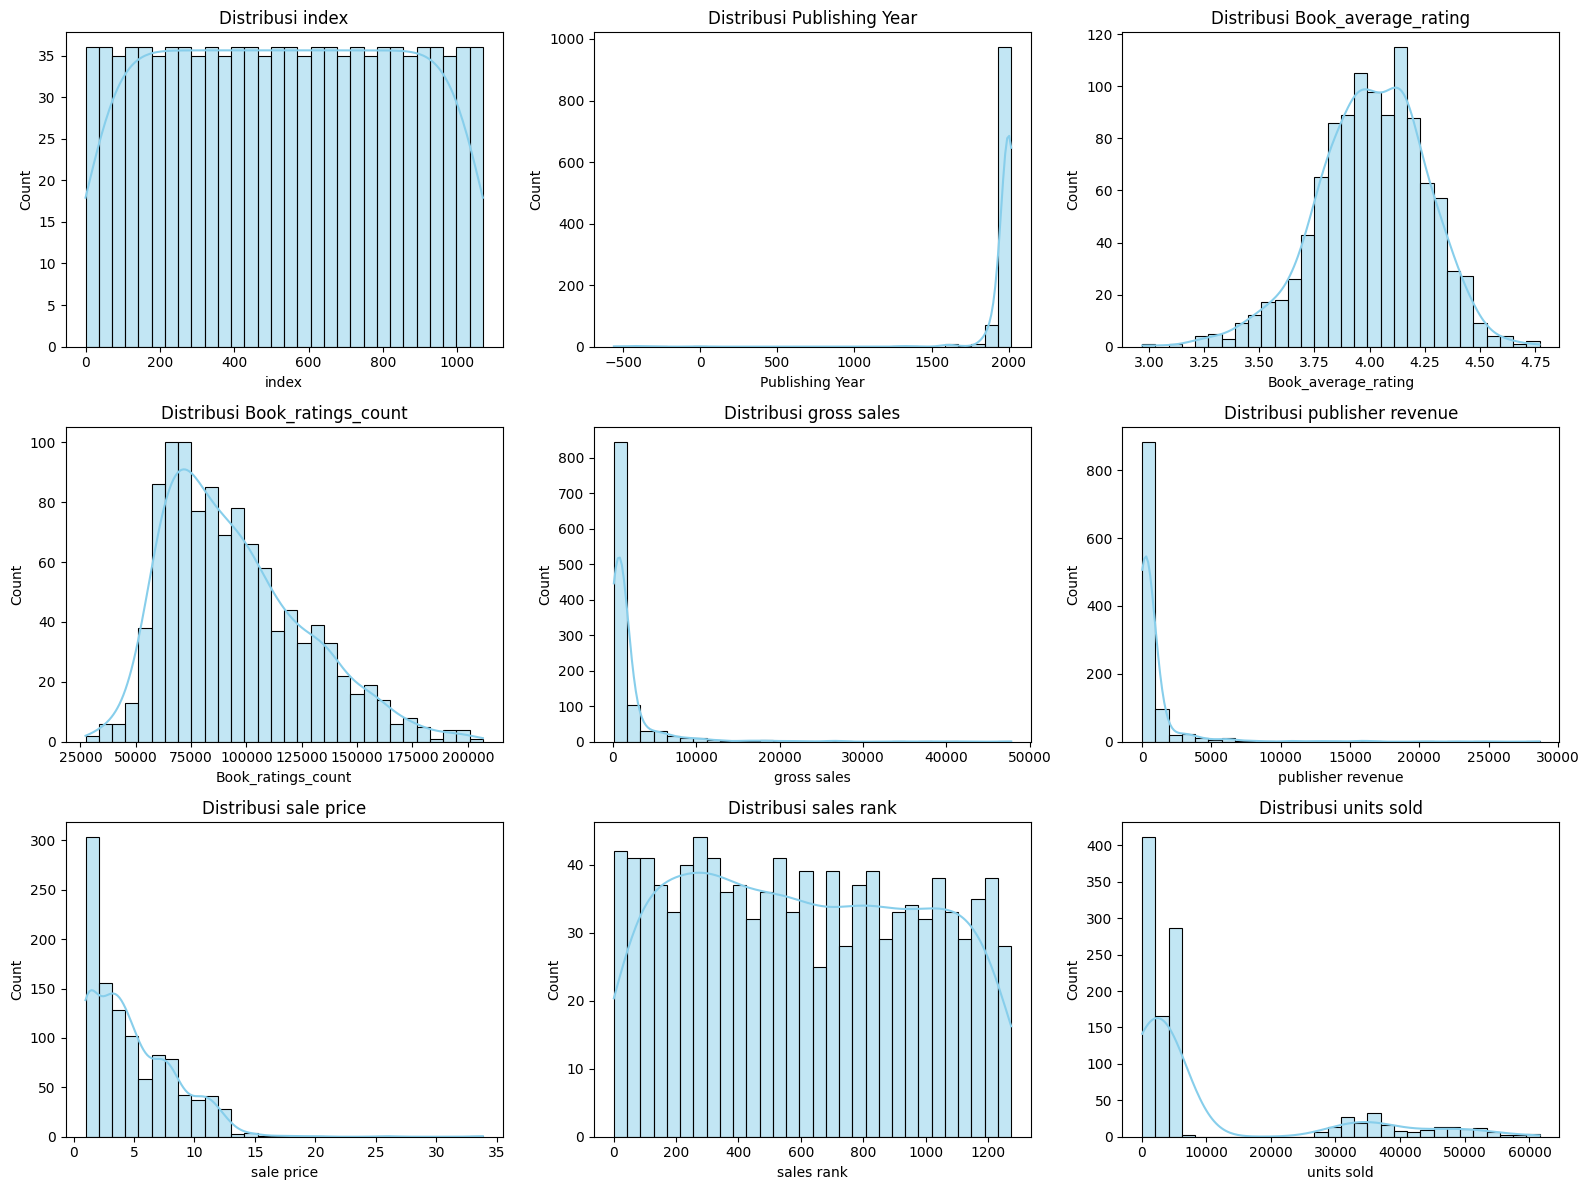

In [8]:
num_features = book.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(book[column].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

- Pada `index` distribusinya seragam karena index tidak mengandung informasi analitis
- Pada `Publishing Year` distribusi terpusat di sekitar tahun 1900 ke atas dan ada nilai ekstrem yaitu tahun di bawah 0, tahun di bawah 0 ini merupakan bagian dari missing value karena tidak mungkin tahun bernilai negatif
- Pada `Book_average_rating` distribusi datanya hampir normal
- Pada `Book_ratings_count` distribusi data miring ke kanan (right-skewed)
- Pada `gross sales` distribusi data sangat miring ke kanan
- Pada `publisher revenue` distribusi data miring ke kanan
- Pada `sale price` data miring ke kanan (right-skewed)
- Pada `sales rank` distribusi data hampir uniform atau penyebaran data cukup rata
- Pada `units sold` distribusi data sangat miring ke kanan

<ipython-input-9-6374c0e7ecb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-9-6374c0e7ecb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-9-6374c0e7ecb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
<ipython-input-9-6374c0e7ecb2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is dep

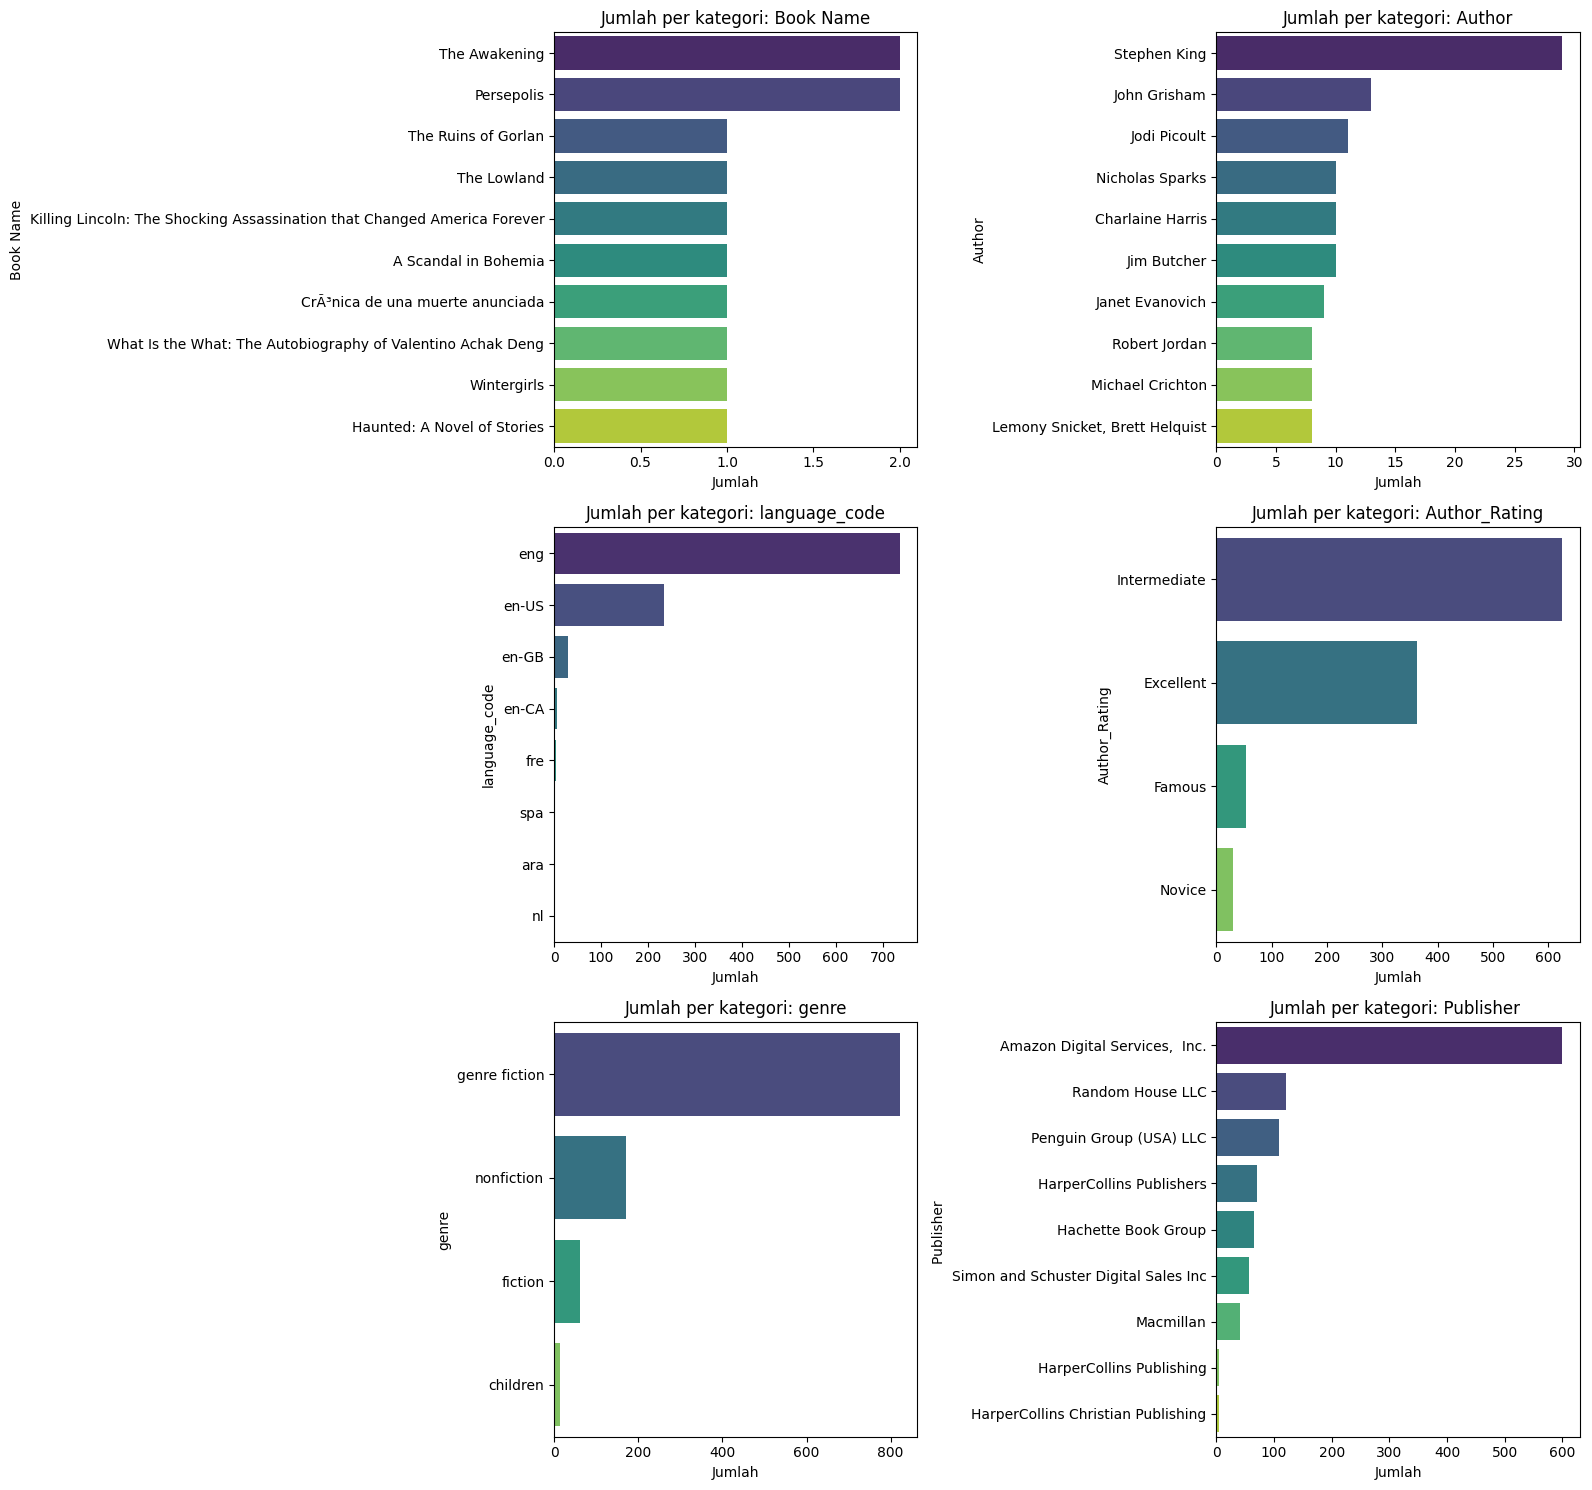

In [9]:
cat_features = book.select_dtypes(include=['object']).columns.tolist()

n_cols = 2
n_rows = (len(cat_features) + 1) // n_cols
plt.figure(figsize=(16, 5 * n_rows))

# Visualisasi masing-masing kolom kategorikal
for i, column in enumerate(cat_features, 1):
    plt.subplot(n_rows, n_cols, i)
    top_categories = book[column].value_counts().nlargest(10)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    plt.title(f'Jumlah per kategori: {column}')
    plt.xlabel('Jumlah')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

- Pada `Book Name` distribusi rata rata sangat rendah karena tidak ada buku yang mendominasi
- Pada `Author` memiliki distribusi long tail distribution dengan auuthor yang paling dominan yaitu Stephen King
- Pada `language_code` didominasi oleh kode eng, yang artinya bahasa utama buku tersebut adalah bahasa inggris
- Pada `Author_Rating` mayoritas memiliki kategori Intermediate dan yang paling rendah Novice
- Pada `genre` didominasi oleh genre fiction dan yang paling rendah genre children
- Pada `Publisher` penerbit terbanyaknya yaitu Amazon Digital Services, Inc

## Data Preparation

In [10]:
# Menangani data kosong pada Book Name
book = book[book['Book Name'].notna()].copy()

# Cek bahasa paling sering muncul
most_common_lang = book['language_code'].mode()[0]
print("Mode language:", most_common_lang)
book['language_code'] = book['language_code'].fillna(most_common_lang)

Mode language: eng


- Untuk mengatasi data yang kosong pada `Book Name` dilakukan penghapusan karena akan sulit melanjutkan analisis jika nama buku tidak ada
- Untuk menangani data yang kosong pada `language_code` dilakukan pengisian menggunakan modus atau data `language_code` yang sering muncul

In [11]:
book.drop(['Author_Rating', 'Book_average_rating', 'Book_ratings_count',
           'gross sales', 'publisher revenue', 'sale price',
           'sales rank', 'units sold', 'index', 'Publishing Year'], axis=1, inplace=True)

- Menghapus variabel `Author_Rating`, `Book_average_rating`, `Book_rating_count`, `gross sales`, `publisher revenue`, `sale price`,`sales rank`, `units sold`,`index`, `Publishing Year` karena tidak diperlukan untuk membuat sistem rekomendasi buku

In [12]:
book.isnull().sum()

,0
Book Name,0
Author,0
language_code,0
genre,0
Publisher,0


- Sudah tidak ada data yang kosong

In [13]:
book.describe()

,Book Name,Author,language_code,genre,Publisher
count,1047,1047,1047,1047,1047
unique,1045,722,8,4,9
top,The Awakening,Stephen King,eng,genre fiction,"Amazon Digital Services, Inc."
freq,2,29,774,805,591


In [14]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1069
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Book Name      1047 non-null   object
 1   Author         1047 non-null   object
 2   language_code  1047 non-null   object
 3   genre          1047 non-null   object
 4   Publisher      1047 non-null   object
dtypes: object(5)
memory usage: 49.1+ KB


- Terdapat 5 variabel bertipe object yaitu `Book Name`, `Author`, `language_code`, `genre`, dan `Publisher`
- Terdapat 1047 data

### TF-IDF Vectorizer

In [15]:
print(book.columns)

Index(['Book Name', 'Author', 'language_code', 'genre', 'Publisher '], dtype='object')


- Terdapat kolom `Book Name`, `Author`, `language_code`, `genre`, dan `Publisher` dengan tipe data yaitu object

In [16]:
book.columns = book.columns.str.strip()

book['content'] = (
    book['genre'].fillna('') + ' ' +
    book['Author'].fillna('') + ' ' +
    book['Publisher'].fillna('') + ' ' +
    book['language_code'].fillna('')  # hapus tanda '+' di sini
)

tf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tf.fit_transform(book['content'])

feature_names = tf.get_feature_names_out()
print(feature_names)

['abbi' 'abercrombie' 'abraham' ... 'ùˆùšø' 'ùˆûœ' 'ûœ']


- Menghapus spasi di awal dan akhir dari setiap nama kolom
- Menggabungkan genre, Author, Publisher, dan language_code menjadi content untuk mempermudah membuat model sistem rekomendasi
- Mentransformasi content menjadi matriks TF-IDF
- Membuat array dari fitur index integer ke fitur nama
- Output yang diperoleh terdapat karakter yang aneh yang sebaiknya dihapus

In [17]:
book['content'] = book['content'].apply(lambda x: re.sub('[^a-zA-Z ]', ' ', x).lower())

- Membersihkan karakter aneh di kolom content

In [18]:
tf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tf.fit_transform(book['content'])

feature_names = tf.get_feature_names_out()
print(feature_names)

['abbi' 'abercrombie' 'abraham' ... 'zinn' 'zusak' 'zwerger']


- Melakukan inisialisasi TF-IDF ulang
- Mentransformasi ulang kolom konten setelah dilakukan pembersihan karakter aneh
- Dari output terlihat bahwa sudah tidak ada karakter yang aneh

In [19]:
tfidf_matrix = tf.fit_transform(book['content'])

print(tfidf_matrix.shape)

(1047, 1437)


- Melakukan fit dan kemudian mentransformasikannya ke dalam bentuk matriks, ukuran matriks yang terbentuk yaitu terdiri dari 1047 baris dengan 1437 kolom

In [20]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

- Melakukan perubahan vektor TF-IDF ke dalam bentuk matriks dengan fungsi todense()

In [21]:
df_tfidf = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book['Book Name']
)
df_tfidf.sample(10, axis=0).sample(4, axis=1)

,schwarz,hans,ned,kinney
Book Name,,,,
Der Steppenwolf: ErzÃ¤hlung,0.0,0.0,0.0,0.0
This Lullaby,0.0,0.0,0.0,0.0
The Silent Wife,0.0,0.0,0.0,0.0
Saving The World and Other Extreme Sports,0.0,0.0,0.0,0.0
The Electric Kool-Aid Acid Test,0.0,0.0,0.0,0.0
The Case for Christ,0.0,0.0,0.0,0.0
"Go, Dog. Go!",0.0,0.0,0.0,0.0
Dolores Claiborne,0.0,0.0,0.0,0.0
"Definitely Dead (Sookie Stackhouse, #6)",0.0,0.0,0.0,0.0


- Membuat dataframe untuk melihat tf-idf matrix
- Pada kolom diisi dengan kata-kata unik dari kolom `content` (fitur TF-IDF) dan baris diisi dengan book name
- Hasil dari output diperoleh semuanya berisi 0.0. Nilai 0.0 dianggap wajar karena kata-kata yang dipilih tidak ada dalam konten buku yang ditampilkan

## Model Development dengan Content Based Filtering

### Cosine Similarity

In [22]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.11736128, 0.02238054, ..., 0.01812848, 0.06621639,
        0.02459919],
       [0.11736128, 1.        , 0.02580266, ..., 0.02090043, 0.01702263,
        0.02836055],
       [0.02238054, 0.02580266, 1.        , ..., 0.03952382, 0.10831931,
        0.49863376],
       ...,
       [0.01812848, 0.02090043, 0.03952382, ..., 1.        , 0.0260748 ,
        0.04344193],
       [0.06621639, 0.01702263, 0.10831931, ..., 0.0260748 , 1.        ,
        0.11905732],
       [0.02459919, 0.02836055, 0.49863376, ..., 0.04344193, 0.11905732,
        1.        ]])

Matriks cosine similarity yang dihasilkan menunjukkan tingkat kemiripan antar buku berdasarkan isi konten mereka (representasi TF-IDF). Nilai similarity berkisar dari 0 hingga 1, dimana:
- 1 berarti dokumen itu identik dengan dirinya sendiri
- Nilai mendekati 1 menunjukkan kemiripan konten yang tinggi antar buku
- Nilai rendah menunjukkan perbedaan konten yang signifikan.

In [23]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['Book Name'], columns=book['Book Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0).sample(5, axis=1)

Shape: (1047, 1047)


Book Name,Everyone Worth Knowing,Crossed,"Sex, Drugs, and Cocoa Puffs: A Low Culture Manifesto",The Audacity of Hope: Thoughts on Reclaiming the American Dream,The Snowy Day
Book Name,,,,,
Brideshead Revisited: The Sacred and Profane Memories of Captain Charles Ryder,0.066967,0.080164,0.063523,0.061535,0.063004
The Black Dahlia,0.085960,0.028959,0.081540,0.078989,0.022760
The Edge of Never,0.107673,0.049992,0.102136,0.098941,0.039291
"Lover Enshrined, part one",0.038592,0.058306,0.036607,0.035462,0.045825
Pygmalion,0.131354,0.081647,0.124599,0.120700,0.064170
What Is the What: The Autobiography of Valentino Achak Deng,0.028012,0.042322,0.026571,0.025740,0.033262
The Summoning,0.164603,0.102315,0.156139,0.151254,0.080414
Tell the Wolves I'm Home,0.083177,0.093887,0.078900,0.076431,0.073790
Bridget Jones: The Edge of Reason,0.069757,0.083504,0.066170,0.064100,0.065630


- Dibuat dataframe dari matriks cosine similarity, output di atas menunjukkan similarity matrix pada beberapa buku secara acak, semakin nilainya mendekati 1 maka tingkat kemiripan buku semakin tinggi

## Mendapatkan Rekomendasi

In [24]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=book[['Book Name', 'genre', 'Author', 'Publisher', 'language_code']], k=5):
    """
    Rekomendasi Buku berdasarkan kemiripan konten (gabungan genre, author, publisher, bahasa, rating).

    Parameter:
    ---
    nama_buku : str
        Judul buku (harus sesuai dengan indeks dalam similarity_data)
    similarity_data : pd.DataFrame
        Matriks similarity (cosine similarity), dengan nama buku sebagai index dan kolom
    items : pd.DataFrame
        Data berisi kolom buku yang ingin ditampilkan pada hasil rekomendasi
    k : int
        Jumlah buku yang direkomendasikan

    Returns:
    ---
    pd.DataFrame
        Data rekomendasi buku paling mirip berdasarkan kemiripan konten
    """

    if nama_buku not in similarity_data.index:
        raise ValueError(f"Buku '{nama_buku}' tidak ditemukan dalam data similarity.")

    sim_scores = similarity_data.loc[nama_buku]

    sim_scores = sim_scores.drop(nama_buku)

    top_k_idx = sim_scores.nlargest(k).index

    rekomendasi = pd.DataFrame(top_k_idx, columns=['Book Name']).merge(items, on='Book Name')
    return rekomendasi

- Membuat model sistem rekomendasi

In [25]:
book[book['Book Name'].eq('A Little Princess')]

,Book Name,Author,language_code,genre,Publisher,content
9,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",eng,genre fiction,Random House LLC,genre fiction frances hodgson burnett nancy b...


- Mencoba mencari buku yang berjudul A Little Princess

In [26]:
book_recommendations('A Little Princess')

,Book Name,genre,Author,Publisher,language_code
0,Loving Frank,genre fiction,Nancy Horan,Hachette Book Group,en-US
1,Skeleton Crew,genre fiction,Stephen King,Random House LLC,eng
2,"Lover Enshrined, part one",genre fiction,J.R. Ward,Random House LLC,eng
3,The Complete Anne of Green Gables Boxed Set,genre fiction,L.M. Montgomery,Random House LLC,eng
4,Anne of the Island,genre fiction,L.M. Montgomery,Random House LLC,eng


- Dari pencarian buku yang berjudul "A Little Princess" diperoleh rekomendasi buku lainnya yaitu "Loving Frank", "Skeleton Crew", "Lover Enshrined, part one", "The Complete Anne of Green Gables Boxed Set", dan "Anne of the Island"

## Evaluasi Model

In [35]:
def precision_at_k_feature(nama_buku, similarity_data, items, k=5, fitur='genre'):
    rekomendasi = book_recommendations(nama_buku, similarity_data, items, k)

    if nama_buku not in items['Book Name'].values:
        raise ValueError(f"Buku '{nama_buku}' tidak ditemukan di data items.")

    nilai_asli = items[items['Book Name'] == nama_buku][fitur].values[0]
    relevan = rekomendasi[fitur] == nilai_asli
    return relevan.sum() / k

- Membuat fungsi untuk evaluasi model

In [36]:
for fitur in ['genre', 'Author', 'Publisher', 'language_code']:
    p = precision_at_k_feature('A Little Princess', cosine_sim_df, book, k=5, fitur=fitur)
    print(f"Precision@5 untuk fitur '{fitur}': {p:.2f}")

Precision@5 untuk fitur 'genre': 1.00
Precision@5 untuk fitur 'Author': 0.00
Precision@5 untuk fitur 'Publisher': 0.80
Precision@5 untuk fitur 'language_code': 0.80


- Dari hasil evaluasi model diperoleh akurasi genre 1, artinya model sangat baik dalam mencari buku dengan genre yang sama
- Dari hasil evaluasi Author diperoleh nilai akurasinya 0 karena tidak ada Author yang sama dengan buku A Little Princess pada buku yang direkomendasikan, hal ini bukan berarti model tidak baik, namun model lebih mementingkan kesamaan tema buku dari pada penulis
- Dari hasil evaluasi Publisher diperoleh nilai akurasinya 0,8 yang artinya sudah hampir semua buku yang direkomendasikan memiliki Publisher yang sama
- Dari hasil evaluasi language_code diperoleh nilai akurasinya 0,8, yang artinya sudah hampir semua buku yang direkomendasikan memiliki kode bahasa buku yang sama
